In [82]:
# for downloading the dataset :-  https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/
# The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

In [ ]:
#start...

# importing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# loading data set:

In [6]:
ds= pd.read_csv('Twitter Sentiments.csv')
ds.head(100)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
95,96,0,@user i'll always hope that one day i'll get t...
96,97,0,#model i love u take with u all the time in ...
97,98,0,couple having sex fat naked japanese girls
98,99,0,#hump on that #hump day #humpersð© @ edwa...


In [7]:
#datatype info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# preprocessing the dataset

In [9]:
#removes pattern in the text:
def remove_pattern(input_txt,pattern):
    r= re.findall(pattern,input_txt)
    for word in r:
        input_txt= re.sub(word,"",input_txt)
    return input_txt

In [11]:
ds.head(100)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
95,96,0,@user i'll always hope that one day i'll get t...,i'll always hope that one day i'll get to hug...
96,97,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
97,98,0,couple having sex fat naked japanese girls,couple having sex fat naked japanese girls
98,99,0,#hump on that #hump day #humpersð© @ edwa...,#hump on that #hump day #humpersð© edwar...


In [10]:
#remove twitter handle:
ds['clean_tweet']= np.vectorize(remove_pattern)(ds['tweet'],"@[\w]*")


In [12]:
ds.head(100)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
95,96,0,@user i'll always hope that one day i'll get t...,i'll always hope that one day i'll get to hug...
96,97,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
97,98,0,couple having sex fat naked japanese girls,couple having sex fat naked japanese girls
98,99,0,#hump on that #hump day #humpersð© @ edwa...,#hump on that #hump day #humpersð© edwar...


In [13]:
#remove special characters, numbers and punctuations
ds['clean_tweet']= ds['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
ds.head(100)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
95,96,0,@user i'll always hope that one day i'll get t...,i ll always hope that one day i ll get to hug...
96,97,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
97,98,0,couple having sex fat naked japanese girls,couple having sex fat naked japanese girls
98,99,0,#hump on that #hump day #humpersð© @ edwa...,#hump on that #hump day #humpers edwar...


In [15]:
#removing shorting length of words
ds['clean_tweet']= ds['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
ds.head(100)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
95,96,0,@user i'll always hope that one day i'll get t...,always hope that think that gonna happen anyti...
96,97,0,#model i love u take with u all the time in ...,#model love take with time
97,98,0,couple having sex fat naked japanese girls,couple having naked japanese girls
98,99,0,#hump on that #hump day #humpersð© @ edwa...,#hump that #hump #humpers edwardsville pennsyl...


In [17]:
#individual words considerate as tokens
tokenized_tweet = ds['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(100)

0     [when, father, dysfunctional, selfish, drags, ...
1     [thanks, #lyft, credit, cause, they, offer, wh...
2                               [bihday, your, majesty]
3                      [#model, love, take, with, time]
4                    [factsguide, society, #motivation]
                            ...                        
95    [always, hope, that, think, that, gonna, happe...
96                     [#model, love, take, with, time]
97             [couple, having, naked, japanese, girls]
98    [#hump, that, #hump, #humpers, edwardsville, p...
99      [personalised, here, #shop, #cool, #home, #fun]
Name: clean_tweet, Length: 100, dtype: object

In [24]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenised_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenised_tweet.head(100)

0     [when, father, dysfunct, selfish, drag, kid, i...
1     [thank, #lyft, credit, caus, they, offer, whee...
2                               [bihday, your, majesti]
3                      [#model, love, take, with, time]
4                          [factsguid, societi, #motiv]
                            ...                        
95    [alway, hope, that, think, that, gonna, happen...
96                     [#model, love, take, with, time]
97                   [coupl, have, nake, japanes, girl]
98    [#hump, that, #hump, #humper, edwardsvil, penn...
99        [personalis, here, #shop, #cool, #home, #fun]
Name: clean_tweet, Length: 100, dtype: object

In [25]:
#combine word into single sentence
for i in range(len(tokenised_tweet)):
    tokenised_tweet[i]= " ".join(tokenised_tweet[i])

ds['clean_tweet']=tokenised_tweet
ds.head(100)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
95,96,0,@user i'll always hope that one day i'll get t...,alway hope that think that gonna happen anytim...
96,97,0,#model i love u take with u all the time in ...,#model love take with time
97,98,0,couple having sex fat naked japanese girls,coupl have nake japanes girl
98,99,0,#hump on that #hump day #humpersð© @ edwa...,#hump that #hump #humper edwardsvil pennsylvania


# Exploratory Data Analysis

In [36]:
!pip install wordcloud

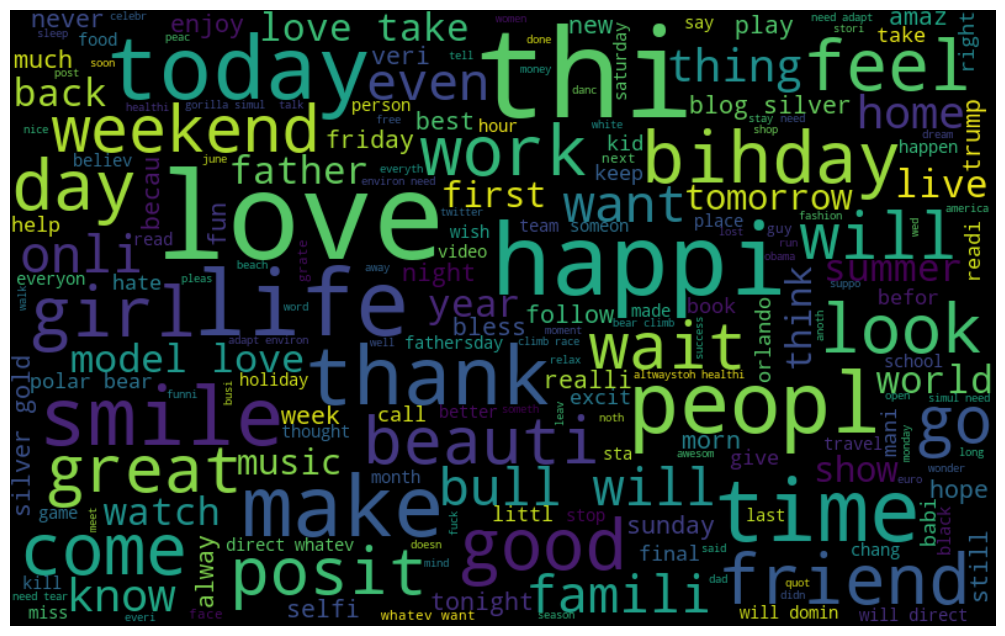

In [40]:
#visualise the frequent word
all_word = "".join([sentence for sentence in ds['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_word)



#print the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

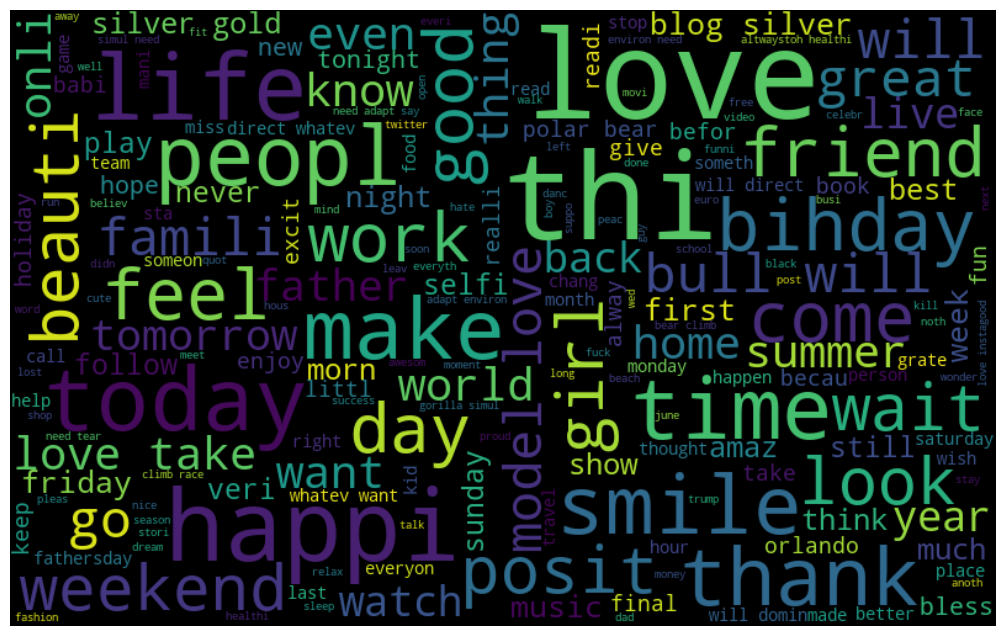

In [41]:
#frequent words visualization for +ve words 
all_word = "".join([sentence for sentence in ds['clean_tweet'][ds['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_word)



#print the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

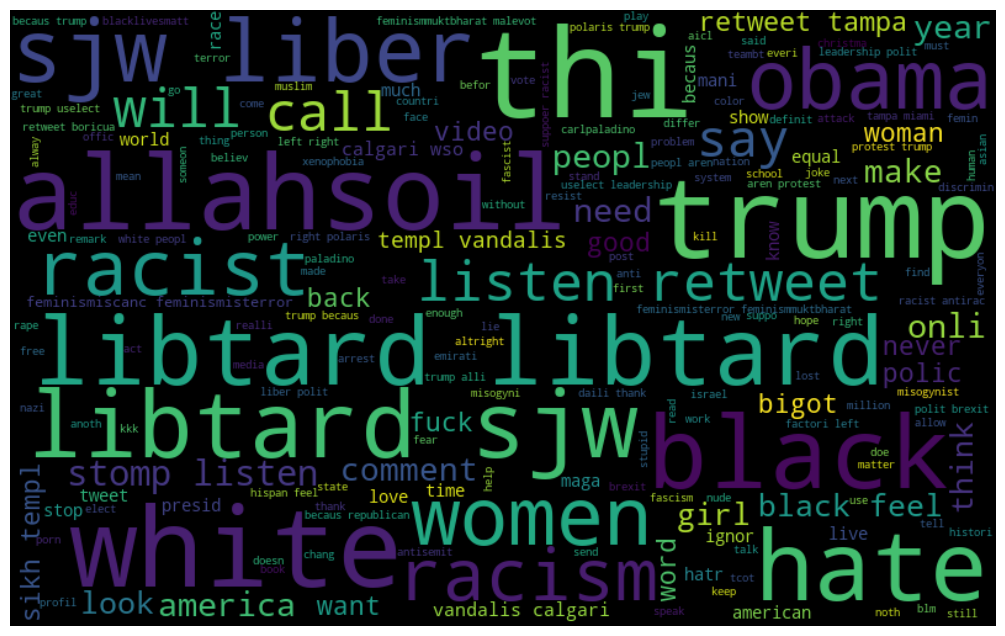

In [42]:
#frequently used -ve words
all_word = "".join([sentence for sentence in ds['clean_tweet'][ds['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_word)



#print the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
#extrating the hashtag
def hashtag_extract(tweet):
    hashtags=[]
    #loop words in the tweet
    for word in tweet:
        ht= re.findall(r"#(\w+)",word)
        hashtags.append(ht)
    return hashtags   

In [46]:
#extracting hashtags from non racist/sexiest tweets
ht_positive = hashtag_extract(ds['clean_tweet'][ds['label']==0])

#extracting hashtags from  racist/sexiest tweets
ht_negative = hashtag_extract(ds['clean_tweet'][ds['label']==1])


In [48]:
ht_positive[:100]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [50]:
ht_negative[:100]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [51]:
#unnest list
ht_positive= sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [52]:
ht_positive[:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [53]:
frq = nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag': list(frq.keys()),
               'Count': list(frq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


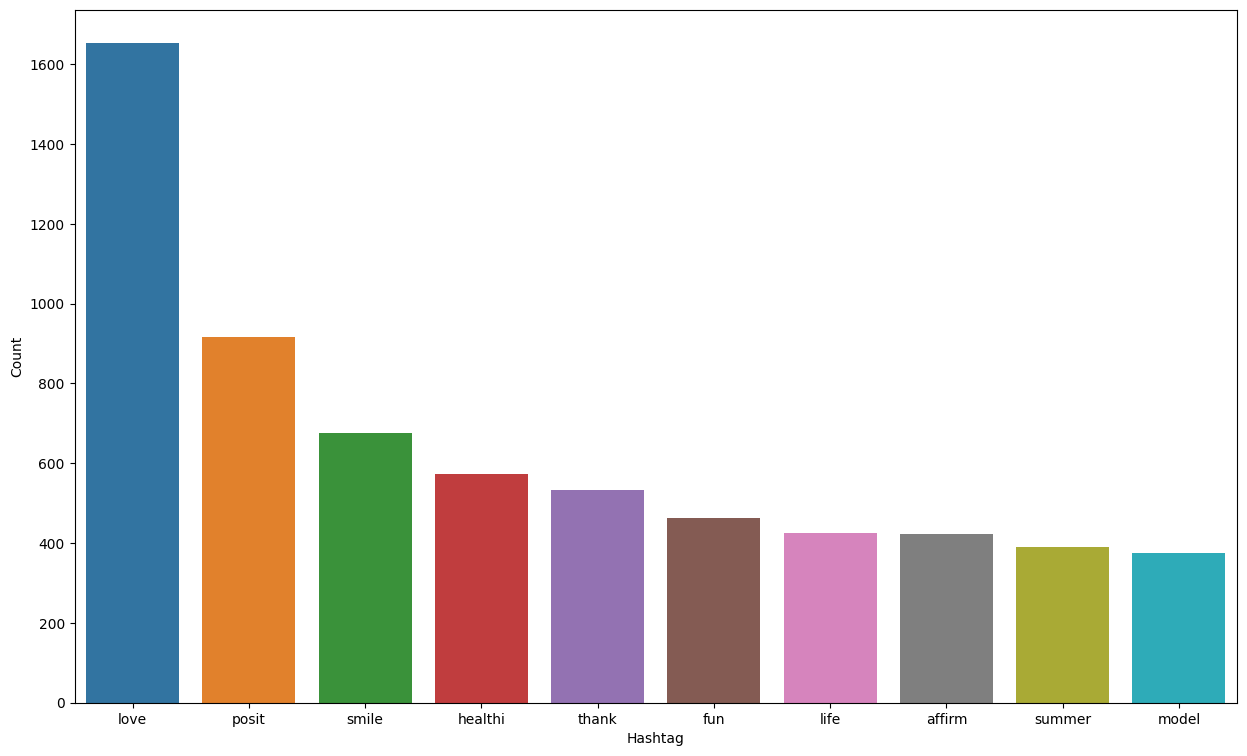

In [54]:
#select top 10 hashtag
d= d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [55]:
frq = nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag': list(frq.keys()),
               'Count': list(frq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


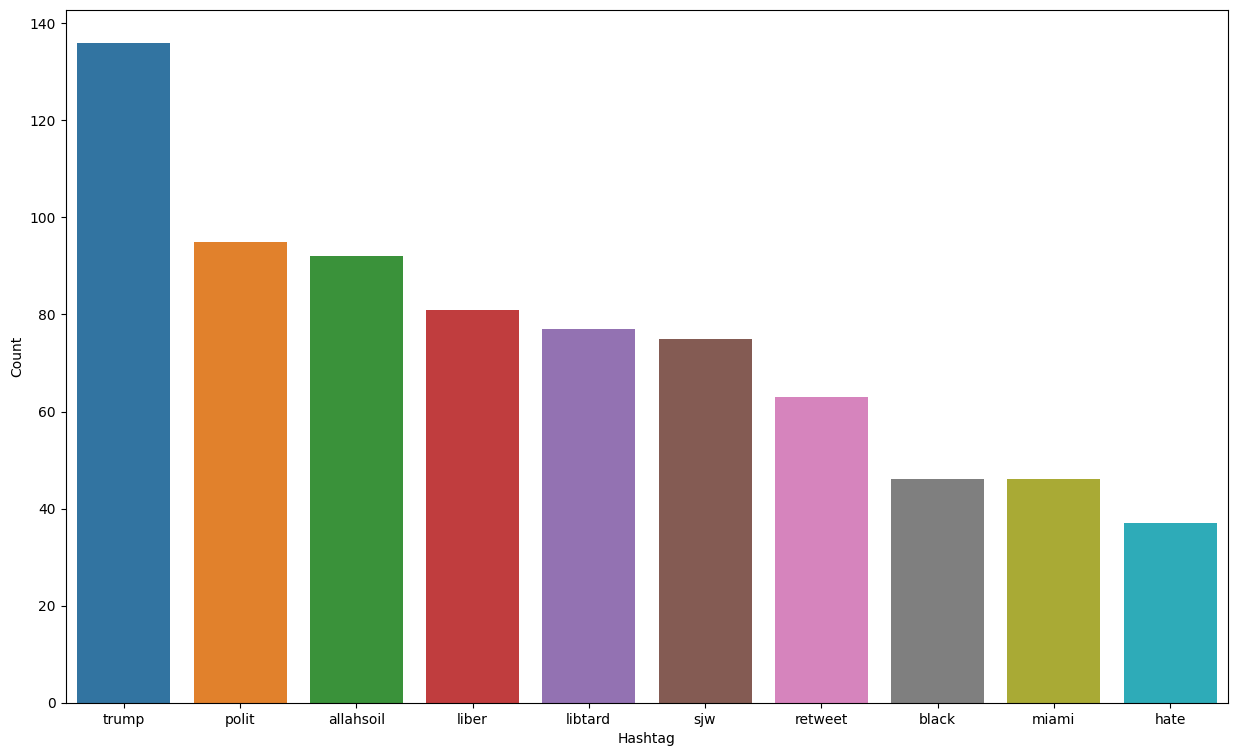

In [56]:
d= d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

# Input Split

In [69]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(ds['clean_tweet'])

In [80]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, ds['label'], random_state=42, test_size=0.25)

# Model Training

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [74]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [75]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [76]:
accuracy_score(y_test,pred)

0.9469403078463271

In [77]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [66]:
accuracy_score(y_test,pred)

0.9433112251282693

In [67]:

pred_prob[0][1] >= 0.3

False